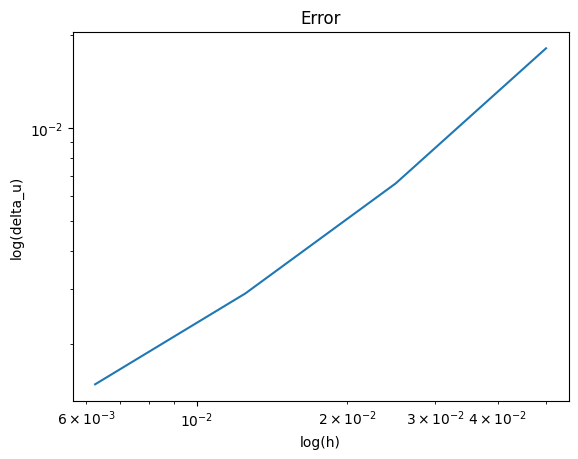

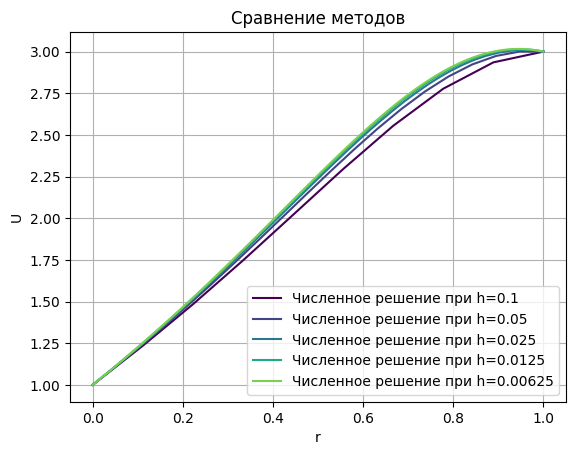

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import solve

# Определение коэффициентов и граничных условий
a, b = 1, 3
k = lambda x: np.exp(np.cos(x))  # Постоянный коэффициент k(x)
q = lambda x: np.exp(np.sin(x))  # Постоянный коэффициент q(x)
f = lambda x: 1  # Постоянная функция f(x)
alpha = 1  # Граничное условие u(0) = alpha
beta = 3  # Граничное условие u(1) = beta

# Определение количества узлов и элементов
num_nodes = 50


def finite_element_solution(a, b, k, q, f, alpha, beta, num_nodes):
    # Определение узлов и конечных элементов
    nodes = np.linspace(a, b, num_nodes)
    # print(nodes)
    elements = np.array([range(i, i + 2) for i in range(num_nodes - 1)])
    # print(elements)

    # Построение матрицы жесткости для каждого элемента
    def local_stiffness_matrix(element, nodes):
        h = nodes[element[1]] - nodes[element[0]]
        k_matrix = np.array([[1, -1], [-1, 1]]) * k(nodes[element[0]])
        q_avg = (q(nodes[element[0]]) + q(nodes[element[1]])) / 2
        k_matrix += np.array([[q_avg, -q_avg], [-q_avg, q_avg]]) * h / 6
        return k_matrix / h

    # Построение вектора правой части для каждого элемента
    def local_load_vector(element, nodes):
        h = nodes[element[1]] - nodes[element[0]]
        f_avg = (f((nodes[element[0]] + nodes[element[1]]) / 2) + f((nodes[element[0]] + nodes[element[1]]) / 2)) / 2
        f_vector = np.array([f_avg * h / 2, f_avg * h / 2])
        return f_vector


    # Сборка глобальной матрицы жесткости и вектора правой части
    K_global = np.zeros((num_nodes, num_nodes))
    F_global = np.zeros(num_nodes)

    for element in elements:
        K_local = local_stiffness_matrix(element, nodes)
        F_local = local_load_vector(element, nodes)

        for i in range(2):
            for j in range(2):
                K_global[element[i], element[j]] += K_local[i, j]
            F_global[element[i]] += F_local[i]

    # Применение граничных условий
    K_global[0, 0] = 1
    K_global[0, 1:] = 0
    F_global[0] = alpha

    K_global[-1, -1] = 1
    K_global[-1, :-1] = 0
    F_global[-1] = beta

    # Решение системы линейных уравнений
    U = solve(K_global, F_global)

    return U

num_nodes_list = [10, 20, 40, 80, 160]
error_list = []

u_plot_1 = finite_element_solution(a, b, k, q, f, alpha, beta, num_nodes_list[0])
u_plot_2 = []
for i in range(0, num_nodes_list[1], 2):
    u_plot_extra2 = finite_element_solution(a, b, k, q, f, alpha, beta, num_nodes_list[1])
    u_plot_2.append(u_plot_extra2[i])
u_plot_3 = []
for i in range(0, num_nodes_list[2], 4):
    u_plot_extra3 = finite_element_solution(a, b, k, q, f, alpha, beta, num_nodes_list[2])
    u_plot_3.append(u_plot_extra3[i])
u_plot_4 = []
for i in range(0, num_nodes_list[3], 8):
    u_plot_extra4 = finite_element_solution(a, b, k, q, f, alpha, beta, num_nodes_list[3])
    u_plot_4.append(u_plot_extra4[i])
u_plot_5 = []
for i in range(0, num_nodes_list[4], 16):
    u_plot_extra5 = finite_element_solution(a, b, k, q, f, alpha, beta, num_nodes_list[-1])
    u_plot_5.append(u_plot_extra5[i])

u_plot_21 = np.max(np.abs((np.array(u_plot_2) - np.array(u_plot_1))))
u_plot_32 = np.max(np.abs((np.array(u_plot_3) - np.array(u_plot_2))))
u_plot_43 = np.max(np.abs((np.array(u_plot_4) - np.array(u_plot_3))))
u_plot_54 = np.max(np.abs((np.array(u_plot_5) - np.array(u_plot_4))))

delta_u = [u_plot_21, u_plot_32, u_plot_43, u_plot_54]


# Построение графика решения
plt.loglog(1/np.array(num_nodes_list[1:]), delta_u)
plt.xlabel('log(h)')
plt.ylabel('log(delta_u)')
plt.title('Error')
plt.show()

for i in range(len(num_nodes_list)):
    x_plot = np.linspace(0, 1, num_nodes_list[i])
    U_p_plot = finite_element_solution(a, b, k, q, f, alpha, beta, num_nodes_list[i])
    U_p_plot = U_p_plot[:]
    color = plt.get_cmap()(i / len(num_nodes_list))
    plt.plot(x_plot, U_p_plot, color=color, label=f'Численное решение при h={1/num_nodes_list[i]}')

plt.xlabel('r')
plt.ylabel('U')
plt.title('Сравнение методов')
plt.legend()
plt.grid(True)
plt.show()